In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import mannwhitneyu


hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

In [2]:
# PRÉ PROCESSAMENTO DE DADOS - HYPOTHESES

# Informações básicas
print('Informações:')
print(hypotheses.info())

print('')

# Contar valores ausentes
print('Valores ausentes:')
print(hypotheses.isnull().sum())

print('')

# Contar duplicatas
print('Duplicatas:')
print(hypotheses.duplicated().sum())

Informações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None

Valores ausentes:
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

Duplicatas:
0


In [3]:
# Limpar e padronizar os nomes das colunas
hypotheses.columns = hypotheses.columns.str.strip().str.lower()

print(hypotheses.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')


In [4]:
# PRÉ PROCESSAMENTO DE DADOS - ORDERS

# Informações básicas
print('Informações:')
print(orders.info())

print('')

# Contar valores ausentes
print('Valores ausentes:')
print(orders.isnull().sum())

print('')

# Contar duplicatas
print('Duplicatas:')
print(orders.duplicated().sum())

Informações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None

Valores ausentes:
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Duplicatas:
0


In [5]:
# Alterando formato de coluna 'date' para data:
orders['date'] = pd.to_datetime(orders['date'])

print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB
None


In [6]:
# PRÉ PROCESSAMENTO DE DADOS - VISITS

# Informações básicas
print('Informações:')
print(visits.info())

print('')

# Contar valores ausentes
print('Valores ausentes:')
print(visits.isnull().sum())

print('')

# Contar duplicatas
print('Duplicatas:')
print(visits.duplicated().sum())

Informações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

Valores ausentes:
date      0
group     0
visits    0
dtype: int64

Duplicatas:
0


In [7]:
# Alterando formato de coluna 'date' para data:
visits['date'] = pd.to_datetime(visits['date'])

# Alterando formato de coluna 'group' para categoria:
visits['group'] = visits['group'].astype('category')

print(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     category      
 2   visits  62 non-null     int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 1.3 KB
None


Priorizando Hipóteses:

Aplicando o framework ICE para priorizar hipóteses e classificando em ordem decrescente de prioridade.

In [8]:
# Calcular o ICE
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

# Ordenar em ordem decrescente
hypotheses_ice = hypotheses.sort_values(by='ICE', ascending=False)

print(hypotheses_ice[['hypothesis', 'ICE']].round(2))

                                          hypothesis    ICE
8  Launch a promotion that gives users discounts ...  16.20
0  Add two new channels for attracting traffic. T...  13.33
7  Add a subscription form to all the main pages....  11.20
6  Show banners with current offers and sales on ...   8.00
2  Add product recommendation blocks to the store...   7.00
1  Launch your own delivery service. This will sh...   2.00
5  Add a customer review page. This will increase...   1.33
3  Change the category structure. This will incre...   1.12
4  Change the background color on the main page. ...   1.00


Aplicando o framework RICE para priorizar hipóteses e classificando em ordem decrescente de prioridade.

In [9]:
# Calcular o RICE
hypotheses['RICE'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

# Ordenar em ordem decrescente
hypotheses_rice = hypotheses.sort_values(by='RICE', ascending=False)

print(hypotheses_rice[['hypothesis', 'RICE']])

                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


Analisando se a priorização de hipóteses muda quando você usa RICE em vez de ICE:

In [10]:
# Adicionar classificações
hypotheses_ice['ICE Rank'] = hypotheses_ice['ICE'].rank(ascending=False).astype(int)
hypotheses_rice['RICE Rank'] = hypotheses_rice['RICE'].rank(ascending=False).astype(int)

# Combinar os resultados
comparison = hypotheses.merge(hypotheses_ice[['hypothesis', 'ICE Rank']], on='hypothesis')
comparison = comparison.merge(hypotheses_rice[['hypothesis', 'RICE Rank']], on='hypothesis')

print(comparison[['hypothesis', 'ICE', 'ICE Rank', 'RICE', 'RICE Rank']].sort_values(by='RICE Rank'))


                                          hypothesis        ICE  ICE Rank  \
7  Add a subscription form to all the main pages....  11.200000         3   
2  Add product recommendation blocks to the store...   7.000000         5   
0  Add two new channels for attracting traffic. T...  13.333333         2   
6  Show banners with current offers and sales on ...   8.000000         4   
8  Launch a promotion that gives users discounts ...  16.200000         1   
3  Change the category structure. This will incre...   1.125000         8   
1  Launch your own delivery service. This will sh...   2.000000         6   
5  Add a customer review page. This will increase...   1.333333         7   
4  Change the background color on the main page. ...   1.000000         9   

    RICE  RICE Rank  
7  112.0          1  
2   56.0          2  
0   40.0          3  
6   40.0          3  
8   16.2          5  
3    9.0          6  
1    4.0          7  
5    4.0          7  
4    3.0          9  


O framework ICE prioriza hipóteses com base em três fatores (impacto, confiança e esforço), enquanto o RICE também adiciona o fato 'alcance do usuário'. O RICE geralmente prioriza hipóteses com maior alcance. Mesmo que uma hipótese tenha um impacto ou confiança menores, ela pode ser priorizada devido ao grande número de pessoas que pode atingir.

Hipóteses com alto alcance (Reach) tendem a subir no ranking ao usar RICE, pois o alcance multiplica o valor final da fórmula.
Hipóteses com alto impacto, confiança, mas alcance baixo podem cair no ranking ao usar RICE, porque o alcance se torna um fator decisivo.

**Análise de teste A/B**

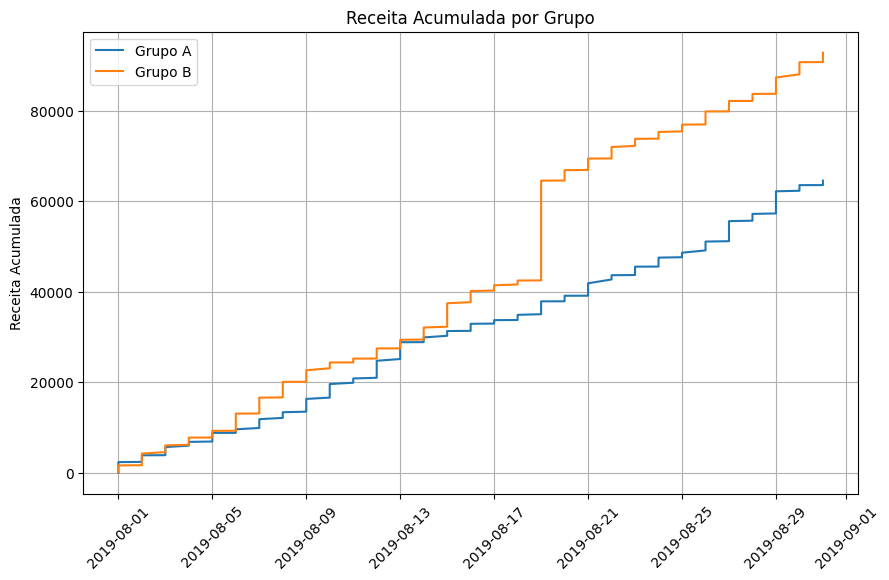

In [19]:
# Ordenar os dados por data
orders.sort_values(by='date', inplace=True)

# Receita acumulada por grupo
orders['revenue_cumulative'] = orders.groupby('group')['revenue'].cumsum()

# Plotar a receita acumulada por grupo
plt.figure(figsize=(10, 6))
for group in orders['group'].unique():
    group_data = orders[orders['group'] == group]
    plt.plot(group_data['date'], group_data['revenue_cumulative'], label=f'Grupo {group}')

plt.title('Receita Acumulada por Grupo')
plt.ylabel('Receita Acumulada')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Conclusões e conjecturas:

Grupo B tem mais receita acumulada que o Grupo A.

O fato de o Grupo B ter mais receita acumulada, indica que a modificação implementada neste grupo foi eficaz, e pode indicar que os clientes estão comprando mais ou que o site ou estratégia de marketing está se tornando mais eficaz à medida que o teste avança.

**Gráfico do tamanho médio acumulado do pedido por grupo:**

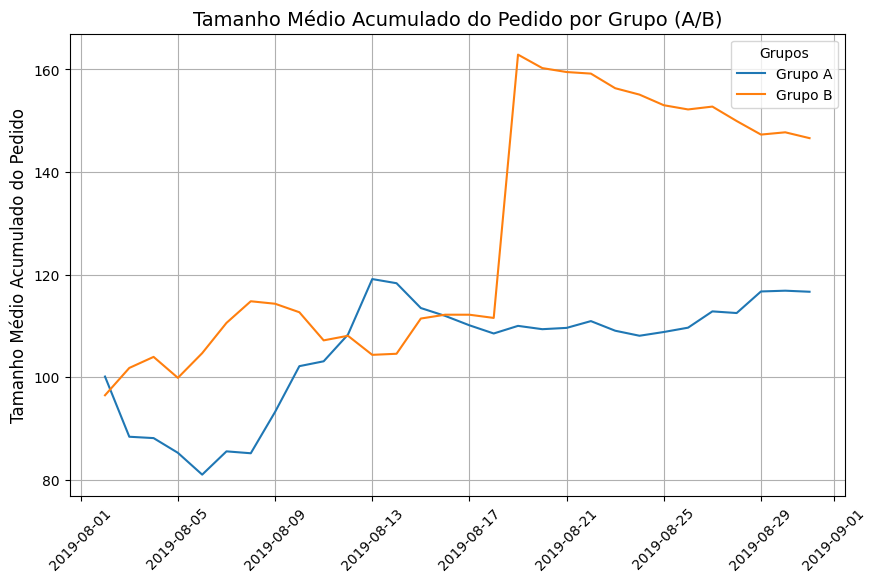

In [20]:
# Tamanho médio acumulado do pedido por grupo
orders['count_cumulative'] = orders.groupby('group').cumcount()
orders['average_order_value_cumulative'] = orders['revenue_cumulative'] / orders['count_cumulative']

# Agrupar por data e grupo, calculando o tamanho médio acumulado do pedido
avg_order_value_by_date = orders.groupby(['date', 'group'])['average_order_value_cumulative'].max().reset_index()

# Plotar o gráfico
plt.figure(figsize=(10, 6))
for group in avg_order_value_by_date['group'].unique():
    group_data = avg_order_value_by_date[avg_order_value_by_date['group'] == group]
    plt.plot(group_data['date'], group_data['average_order_value_cumulative'], label=f'Grupo {group}')
    
plt.title('Tamanho Médio Acumulado do Pedido por Grupo (A/B)', fontsize=14)
plt.ylabel('Tamanho Médio Acumulado do Pedido', fontsize=12)
plt.legend(title="Grupos")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Conclusões e conjecturas:
Grupo B apresenta um aumento significativo no tamanho médio do pedido, enquanto o Grupo A tem variação mais estável.

O Grupo B parece ter um desempenho superior em termos de valor acumulado, com uma média maior de pedidos em relação ao Grupo A. Após o pico, a tendência do Grupo B se estabiliza, mas ainda assim permanece com um valor médio mais alto do que o Grupo A.

O Grupo B pode estar recebendo uma estratégia de marketing mais focada em vendas de maior valor, como descontos progressivos, ofertas exclusivas ou melhores incentivos para compras maiores. Isso pode justificar os picos de receita observados.

**Gráfico da diferença relativa no tamanho médio acumulado do pedido para o grupo B em comparação com o grupo A:**

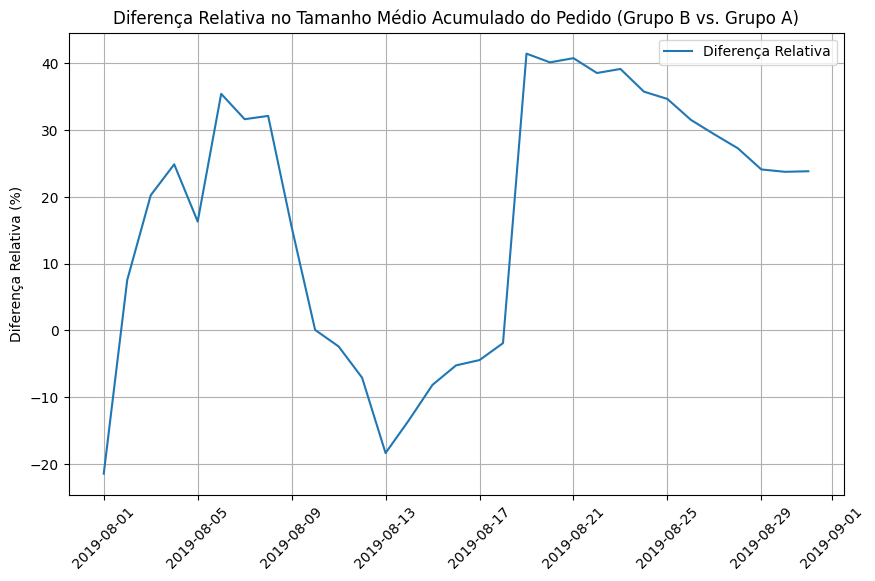

In [21]:
# Agrupar os dados de 'orders' por data e grupo, e calcular o tamanho médio acumulado do pedido
orders_grouped = orders.groupby(['date', 'group']).agg(total_revenue=('revenue', 'sum'),total_orders=('transactionId', 'count')).reset_index()

# Tamanho médio do pedido por grupo
orders_grouped['average_order_size'] = orders_grouped['total_revenue'] / orders_grouped['total_orders']

# Cumsum (acumulado) do tamanho médio do pedido
orders_grouped['cumsum_average_order_size'] = orders_grouped.groupby('group')['average_order_size'].cumsum()

# Diferença relativa no tamanho médio acumulado do pedido para o grupo B em comparação com o grupo A
group_a_cumsum = orders_grouped[orders_grouped['group'] == 'A']['cumsum_average_order_size']
group_b_cumsum = orders_grouped[orders_grouped['group'] == 'B']['cumsum_average_order_size']

# A diferença relativa
relative_difference = ((group_b_cumsum.values - group_a_cumsum.values) / group_a_cumsum.values) * 100

# Gráfico
plt.figure(figsize=(10,6))
plt.plot(orders_grouped['date'][orders_grouped['group'] == 'A'], relative_difference, label='Diferença Relativa')
plt.ylabel('Diferença Relativa (%)')
plt.title('Diferença Relativa no Tamanho Médio Acumulado do Pedido (Grupo B vs. Grupo A)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Conclusões e conjecturas:

Podemos ver que no início de agosto, a diferença relativa entre os grupos apresenta uma grande variação positiva, com o grupo B tendo um desempenho superior ao grupo A. Porém depois houve uma queda abrupta na diferença relativa, com uma variação negativa.

Isso sugere que o grupo B, que estava se destacando, começou a ter um desempenho pior em comparação com o grupo A, possivelmente devido a uma mudança no comportamento do consumidor, um erro de estratégia ou uma falha temporária em sua oferta.

Após a queda, vemos uma recuperação e um aumento constante na diferença relativa, com o grupo B superando o grupo A novamente. Esse aumento pode indicar que o grupo B conseguiu recuperar o desempenho perdido ou implementar uma melhoria eficaz em suas estratégias, alcançando novamente um maior tamanho médio de pedido.

Depois de 17 de agosto, a diferença relativa se estabiliza. Isso sugere que, após os ajustes realizados, o grupo B manteve um desempenho superior de forma consistente em relação ao grupo A, com uma diferença significativa no tamanho médio acumulado dos pedidos.

**Calculando a taxa de conversão de cada grupo como a proporção de pedidos para o número de visitas para cada dia, traçando as taxas de conversão diárias dos dois grupos e descrevendo a diferença:**

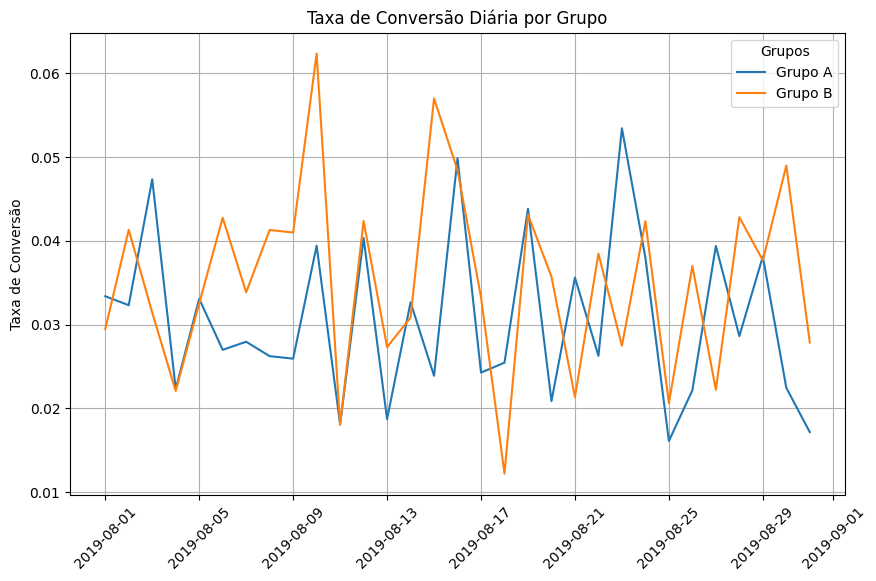

In [22]:
# Número de pedidos por grupo e por dia
orders_grouped = orders.groupby(['date', 'group']).agg(total_orders=('transactionId', 'count')).reset_index()

# Combinar os dados de pedidos e visitas com base na data e no grupo
merged_orders_visits = pd.merge(orders_grouped, visits, on=['date', 'group'])

# Taxa de conversão
merged_orders_visits['conversion_rate'] = merged_data['total_orders'] / merged_data['visits']

# Plotar a taxa de conversão diária por grupo
plt.figure(figsize=(10, 6))
for group in merged_orders_visits['group'].unique():
    group_data = merged_orders_visits[merged_orders_visits['group'] == group]
    plt.plot(group_data['date'], group_data['conversion_rate'], label=f'Grupo {group}')

plt.title('Taxa de Conversão Diária por Grupo')
plt.ylabel('Taxa de Conversão')
plt.legend(title="Grupos")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Conclusões e conjecturas:

O Grupo B parece estar superando consistentemente o Grupo A na maior parte do tempo, o que indica que, em termos gerais, a estratégia ou intervenção aplicada ao Grupo B tem sido mais eficaz em converter visitas em pedidos.

O pico de 15/08 no Grupo A sugere que houve um evento ou mudança significativa que fez com que a taxa de conversão do Grupo A fosse superior à do Grupo B neste dia específico. 

Porém os picos para baixo e para cima indicam uma volatilidade nas taxas de conversão.

**Gráfico da diferença relativa na conversão cumulativa para o grupo B em comparação com o grupo A:**

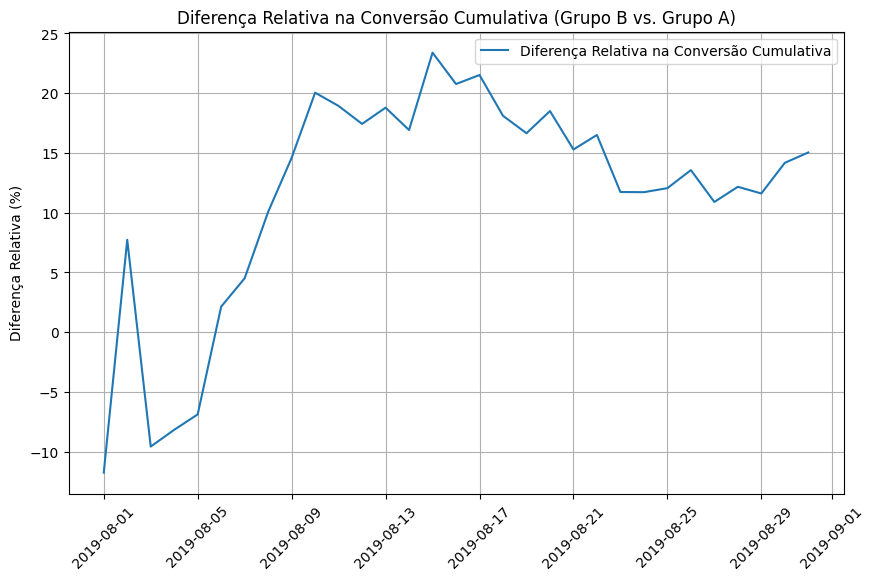

In [24]:
# Conversão acumulada por grupo
merged_orders_visits['conversion_rate_cumulative'] = merged_orders_visits.groupby('group')['conversion_rate'].cumsum()

# Filtrar os dados para os grupos A e B
group_a_cumsum_conversion = merged_orders_visits[merged_orders_visits['group'] == 'A']['conversion_rate_cumulative']
group_b_cumsum_conversion = merged_orders_visits[merged_orders_visits['group'] == 'B']['conversion_rate_cumulative']

# Diferença relativa na conversão cumulativa
relative_conversion_difference = ((group_b_cumsum_conversion.values - group_a_cumsum_conversion.values) / group_a_cumsum_conversion.values) * 100

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(merged_orders_visits['date'][merged_orders_visits['group'] == 'A'], relative_conversion_difference, label='Diferença Relativa na Conversão Cumulativa')

plt.title('Diferença Relativa na Conversão Cumulativa (Grupo B vs. Grupo A)')
plt.ylabel('Diferença Relativa (%)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [15]:
# Número de pedidos por usuário
orders_per_user = orders.groupby('visitorId')['transactionId'].count()

# Percentis 95 e 99
percentil_95 = orders_per_user.quantile(0.95)
percentil_99 = orders_per_user.quantile(0.99)

print(f"Percentil 95: {percentil_95}")
print(f"Percentil 99: {percentil_99}")
print(f"Ponto de anomalia (acima de {percentil_99} pedidos)")

Percentil 95: 2.0
Percentil 99: 4.0
Ponto de anomalia (acima de 4.0 pedidos)


**Gráfico de dispersão dos preços dos pedidos:**

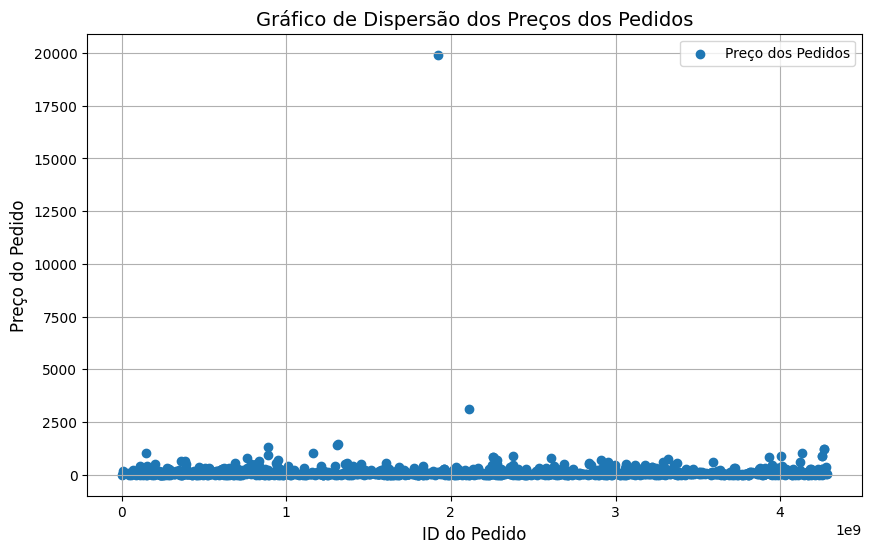

In [16]:
plt.figure(figsize=(10, 6))

# CGráfico de dispersão
plt.scatter(orders['visitorId'], orders['revenue'], label='Preço dos Pedidos')

# Adicionar título e rótulos aos eixos
plt.title('Gráfico de Dispersão dos Preços dos Pedidos', fontsize=14)
plt.xlabel('ID do Pedido', fontsize=12)
plt.ylabel('Preço do Pedido', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

Conclusões e conjecturas:

Temos um valor de 20.000 na diferença relativa na conversão cumulativa entre os grupos A e B, que é um valor atípico significativo. Esse valor está muito distante da tendência geral dos dados, como evidenciado pela maioria dos pontos até 2500.

**Calculando os percentis 95 e 99 dos preços dos pedidos e definindo em que ponto se torna uma anomalia:**

In [17]:
# Percentis 95 e 99 dos preços dos pedidos
percentil_95_price = orders['revenue'].quantile(0.95)
percentil_99_price = orders['revenue'].quantile(0.99)

print(f"Percentil 95: {percentil_95_price}")
print(f"Percentil 99: {percentil_99_price}")
print(f"Anomalias (preços acima do percentil 99): {percentil_99_price} ")

Percentil 95: 435.54
Percentil 99: 900.9039999999999
Anomalias (preços acima do percentil 99): 900.9039999999999 


**Significância estatística da diferença na conversão entre os grupos usando os dados brutos:**

In [45]:
# Agrupar pedidos por usuário
orders_by_userA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
orders_by_userA.columns = ['user_id', 'orders']

orders_by_userB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
orders_by_userB.columns = ['user_id', 'orders']

# Criar amostras para o grupo A
sampleA = pd.concat([orders_by_userA['orders'], pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(orders_by_userA['orders'])), name='orders')], axis=0)

# Criar amostras para o grupo B
sampleB = pd.concat([orders_by_userB['orders'], pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(orders_by_userB['orders'])), name='orders')], axis=0)

# Teste
p_value = mannwhitneyu(sampleA, sampleB)[1]
conversion_difference = sampleB.mean() / sampleA.mean() - 1

print(f"Valor p: {p_value:.3f}")
print(f"Variação relativa na conversão: {conversion_difference:.3f}")


Valor p: 0.017
Variação relativa na conversão: 0.138


Conclusões e conjecturas:

O p-valor de 0.017 está abaixo do limite de significância de 0.05, o que indica que a diferença entre os grupos A e B é estatisticamente significativa.

A variação relativa de 0.138 significa que o grupo B tem uma taxa de conversão 13.8% maior do que o grupo A. Isso sugere que, em média, o grupo B está convertendo mais visitantes em compras do que o grupo A.

**Significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados brutos:**

In [52]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean() - 1))

0.692
0.252


Conclusões e conjecturas:

O p-valor de 0.692 é acima do limite de significância comumente adotado (0.05 ou 0.01). Isso significa que não há diferença estatisticamente significativa entre os tamanhos dos pedidos dos grupos A e B.

**Encontre a significância estatística da diferença na conversão entre os grupos usando os dados filtrados. Tire conclusões e crie conjecturas.**

In [53]:
# Criando os dados filtrados
user_with_many_orders = pd.concat([orders_by_userA[orders_by_userA['orders'] > 5]['user_id'], orders_by_userB[orders_by_userB['orders'] > 4]['user_id']], axis = 0)

# Variavel para usuários que gastaram mais de $5000
users_with_expensive_orders = orders[orders['revenue'] > 5000]['visitorId']

# Juntando as tabelas
ab_normal_users = pd.concat([user_with_many_orders, users_with_expensive_orders], axis = 0).drop_duplicates().sort_values()

# Dados filtrados por grupo
sampleA_filtered = pd.concat([orders_by_userA[np.logical_not(orders_by_userA['user_id'].isin(ab_normal_users))]['orders'], pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orders_by_userA['orders'])), name='orders')], axis=0)
sampleB_filtered = pd.concat([orders_by_userB[np.logical_not(orders_by_userB['user_id'].isin(ab_normal_users))]['orders'], pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(orders_by_userB['orders'])), name='orders')], axis=0)

print("Valor p: {0:.5f}".format(stats.mannwhitneyu(sampleA_filtered, sampleB_filtered)[1]))
print("Variação relativa na conversão: {0:.3f}".format(sampleB_filtered.mean()/sampleA_filtered.mean()-1))


Valor p: 0.01778
Variação relativa na conversão: 0.143


Conclusões e conjecturas:

O valor p de 0.01778 indica que a diferença observada na conversão entre os grupos A e B é estatisticamente significativa, ou seja, não é provavelmente resultado de um acaso. A conversão no grupo B é 14,3% maior que no grupo A, o que sugere que o grupo B pode estar apresentando um desempenho superior em termos de conversão.

**Significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados filtrados:**

In [55]:
print('Valor p: {0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
    orders['group']=='A',
    np.logical_not(orders['visitorId'].isin(ab_normal_users)))]['revenue'],
    orders[np.logical_and(
    orders['group']=='B',
    np.logical_not(orders['visitorId'].isin(ab_normal_users)))]['revenue'])[1]))

print('Variação relativa na conversão:: {0:.3}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(ab_normal_users)))]['revenue'].mean()/
    orders[np.logical_and(
    orders['group']=='A',
    np.logical_not(orders['visitorId'].isin(ab_normal_users)))]['revenue'].mean() - 1 ))


Valor p: 0.922
Variação relativa na conversão:: -0.0361


Conclusões e conjecturas::

O valor p de 0.922 é muito alto,o que indica que não há evidência suficiente para rejeitar a hipótese nula. O valor -0.0361 indica que o grupo B teve uma receita média 3.61% menor do que o grupo A, após a exclusão de usuários com comportamentos atípicos.

**Conclusão e decisão:**

Com base nos fatos apurados, o teste deve ser considerado bem-sucedido. O grupo B apresentou melhores resultados que o grupo A.
Há uma diferença estatisticamente significativa na conversão.
Não há diferença estatisticamente significativa na média da verificação, e a diferença relativa foi obtida por acaso para influenciar a decisão de continuar o teste.
Não faz sentido continuar, porque a probabilidade de, dados os dados disponíveis, o segmento A ser realmente melhor que o segmento B é praticamente zero.